<a href="https://colab.research.google.com/github/kamesh1405/C-/blob/main/org_emotional_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0


--2023-04-26 10:44:58--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2023-04-26 10:44:58--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucddc714d82579b1c163411fe549.dl.dropboxusercontent.com/cd/0/inline/B66BSqAF47Dlsq5YsxaDcCiHpgD_MG90ympmRS0Y8Nb5oBRQKdb6CYCyBZVckv634WTfTG6HN0VXtsYdeGQFeEJVrOUQfj3QpCGjy51U1Y4-UmnUFrJmRX7JjI2EjawBEBNSeG-X1Qv5aaS2Y5ZRfD3lH2AXmBDo7-Ns1lRMf7gBgw/file# [following]
--2023-04-26 10:44:58--  https://ucddc714d82579b1c163411fe549.dl.dropboxusercontent.com/cd/0/inline/B66BSqAF47Dlsq5YsxaDcCiHpgD_MG90ympmRS0Y8Nb5oBRQKdb6CYCyBZVckv634WTfTG6HN0VXtsYdeGQF

In [ ]:
!unzip train.zip?dl=0

#unzipping data


Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [ ]:
from tensorflow.keras.utils import load_img


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model 
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img


In [ ]:
from keras.applications.mobilenet import MobileNet


BUILDING OUR MODEL TO TRAIN THE DATA

In [ ]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False ) #weights

for layer in base_model.layers:
  layer.trainable = False

x= Flatten()(base_model.output)
x= Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
#all the layers of model

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy" , metrics=['accuracy'])

Preparing our Data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip=True,
    rescale = 1./225
)

train_data = train_datagen.flow_from_directory(directory="/content/train", target_size=(224,224),batch_size=32,)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
 val_datagen = ImageDataGenerator(rescale = 1/225 )

 val_data =  val_datagen.flow_from_directory(directory= "/content/train", target_size=(224,224),batch_size=32, )
 

Found 350 images belonging to 7 classes.


Visualizing the data that is fed to train data gen


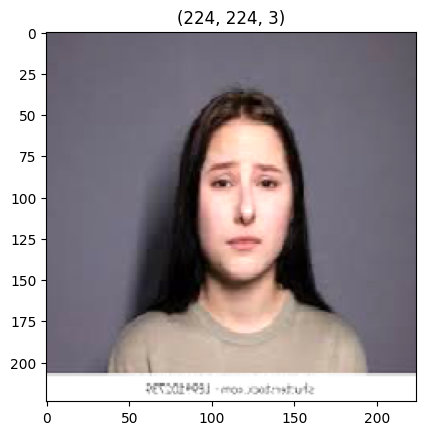

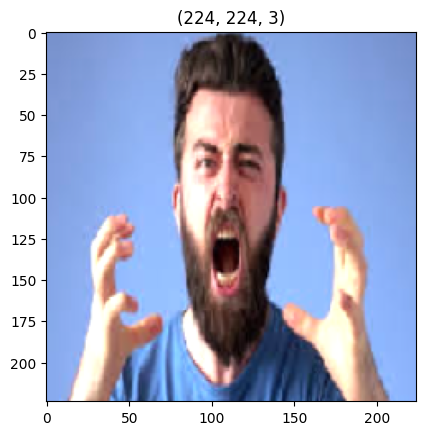

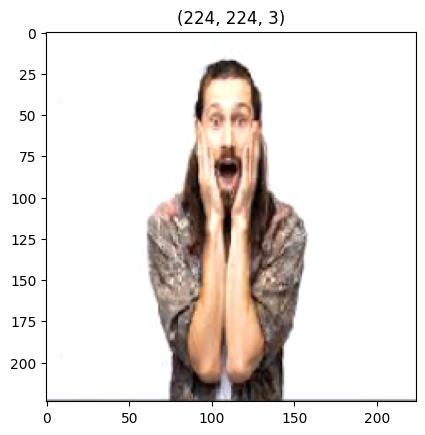

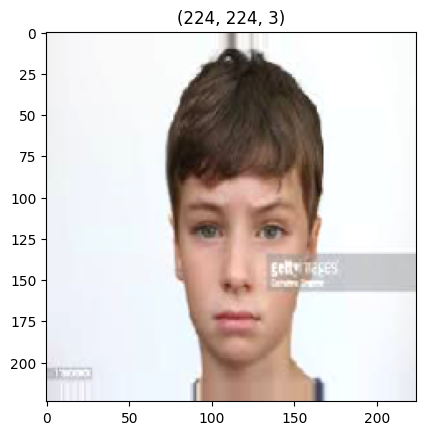

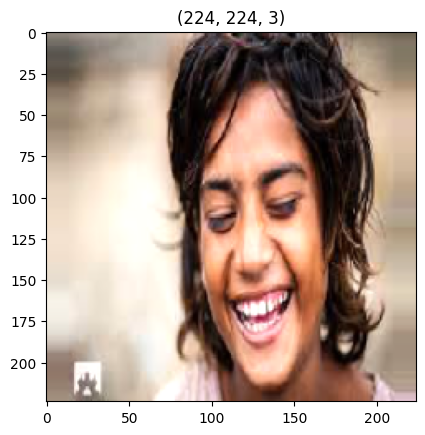

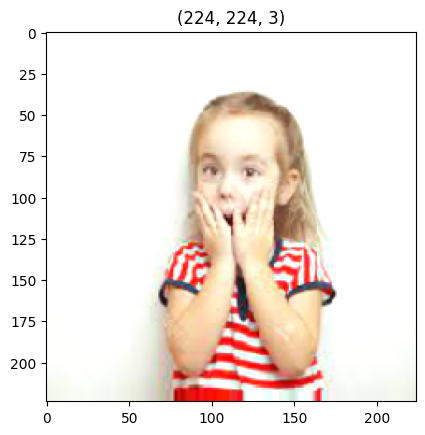

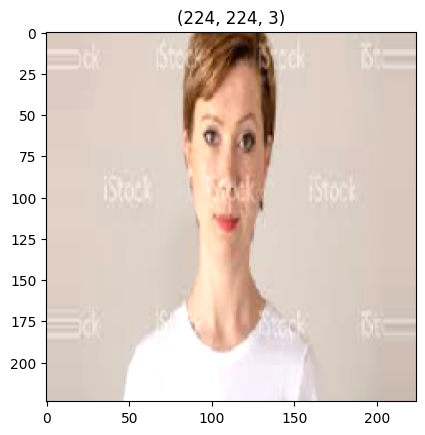

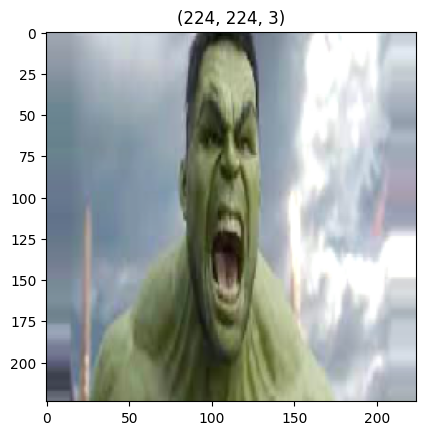

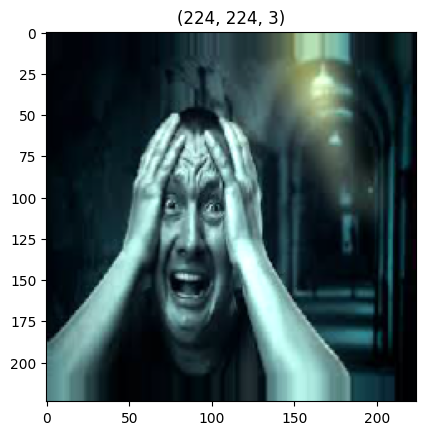

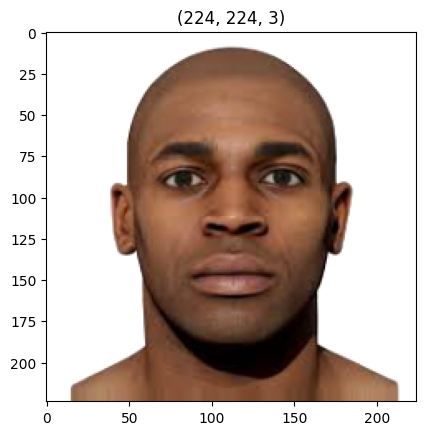

In [ ]:
# to visualize the images in the training data generator

t_img , label = train_data.next()

# function when called will plot the images

def plotImages(img_Arr, label):
  """
  input :- images array
  output :- plots the images
  """
  count = 0
  for im,l in zip(img_Arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count +=1
    if count == 10:
      break
 #function call to plot the images

plotImages(t_img, label)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor='valaccuracy', min_delta= 0.01, patience=5, verbose= 1, mode='auto')

#model check point
mc= ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode='auto')

#puting call back in a list

call_back = [es,mc]

In [ ]:
hist = model.fit_generator(train_data, steps_per_epoch=10,epochs=30,validation_data= val_data,validation_steps= 8, callbacks=[es,mc])

<ipython-input-28-e8cbb823a19d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data, steps_per_epoch=10,epochs=30,validation_data= val_data,validation_steps= 8, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 10.8244 - accuracy: 0.2233


Epoch 1: val_accuracy improved from -inf to 0.54688, saving model to best_model.h5
10/10 [==============================] - 43s 4s/step - loss: 10.8244 - accuracy: 0.2233 - val_loss: 4.0769 - val_accuracy: 0.5469
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.2458 - accuracy: 0.4843


Epoch 2: val_accuracy improved from 0.54688 to 0.66797, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 4.2458 - accuracy: 0.4843 - val_loss: 2.5477 - val_accuracy: 0.6680
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.1268 - accuracy: 0.7264


Epoch 3: val_accuracy improved from 0.66797 to 0.80078, saving model to best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 2.1268 - accuracy: 0.7264 - val_loss: 1.4709 - val_accuracy: 0.8008
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.1303 - accuracy: 0.8208


Epoch 4: val_accuracy improved from 0.80078 to 0.89062, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 1.1303 - accuracy: 0.8208 - val_loss: 0.5473 - val_accuracy: 0.8906
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.8743 - accuracy: 0.8333


Epoch 5: val_accuracy improved from 0.89062 to 0.90234, saving model to best_model.h5
10/10 [==============================] - 44s 5s/step - loss: 0.8743 - accuracy: 0.8333 - val_loss: 0.6902 - val_accuracy: 0.9023
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.8994


Epoch 6: val_accuracy improved from 0.90234 to 0.96484, saving model to best_model.h5
10/10 [==============================] - 32s 3s/step - loss: 0.6046 - accuracy: 0.8994 - val_loss: 0.1407 - val_accuracy: 0.9648
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9403


Epoch 7: val_accuracy improved from 0.96484 to 0.96875, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 0.2424 - accuracy: 0.9403 - val_loss: 0.1269 - val_accuracy: 0.9688
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9594


Epoch 8: val_accuracy improved from 0.96875 to 0.99219, saving model to best_model.h5
10/10 [==============================] - 39s 4s/step - loss: 0.1518 - accuracy: 0.9594 - val_loss: 0.0269 - val_accuracy: 0.9922
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9560


Epoch 9: val_accuracy did not improve from 0.99219
10/10 [==============================] - 30s 3s/step - loss: 0.1415 - accuracy: 0.9560 - val_loss: 0.0110 - val_accuracy: 0.9922
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9811


Epoch 10: val_accuracy did not improve from 0.99219
10/10 [==============================] - 31s 3s/step - loss: 0.0637 - accuracy: 0.9811 - val_loss: 0.0148 - val_accuracy: 0.9922
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9843


Epoch 11: val_accuracy improved from 0.99219 to 1.00000, saving model to best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 0.0432 - accuracy: 0.9843 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9874


Epoch 12: val_accuracy did not improve from 1.00000
10/10 [==============================] - 30s 3s/step - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0073 - val_accuracy: 0.9961
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9969


Epoch 13: val_accuracy did not improve from 1.00000
10/10 [==============================] - 30s 3s/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9843


Epoch 14: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0360 - accuracy: 0.9843 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9874


Epoch 15: val_accuracy did not improve from 1.00000
10/10 [==============================] - 31s 3s/step - loss: 0.0291 - accuracy: 0.9874 - val_loss: 6.3640e-04 - val_accuracy: 1.0000
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9906


Epoch 16: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0524 - accuracy: 0.9906 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9843


Epoch 17: val_accuracy did not improve from 1.00000
10/10 [==============================] - 38s 4s/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0156 - val_accuracy: 0.9961
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9717


Epoch 18: val_accuracy did not improve from 1.00000
10/10 [==============================] - 38s 4s/step - loss: 0.1077 - accuracy: 0.9717 - val_loss: 0.0086 - val_accuracy: 0.9961
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9843


Epoch 19: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0639 - accuracy: 0.9843 - val_loss: 0.0259 - val_accuracy: 0.9922
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.0558 - accuracy: 0.9874


Epoch 20: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0558 - accuracy: 0.9874 - val_loss: 0.0423 - val_accuracy: 0.9844
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9748


Epoch 21: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.1133 - accuracy: 0.9748 - val_loss: 0.0814 - val_accuracy: 0.9766
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 0.0985 - accuracy: 0.9686


Epoch 22: val_accuracy did not improve from 1.00000
10/10 [==============================] - 31s 3s/step - loss: 0.0985 - accuracy: 0.9686 - val_loss: 0.0073 - val_accuracy: 0.9961
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9811


Epoch 23: val_accuracy did not improve from 1.00000
10/10 [==============================] - 40s 4s/step - loss: 0.0433 - accuracy: 0.9811 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9874


Epoch 24: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0308 - accuracy: 0.9874 - val_loss: 0.0081 - val_accuracy: 0.9961
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9811


Epoch 25: val_accuracy did not improve from 1.00000
10/10 [==============================] - 40s 4s/step - loss: 0.0416 - accuracy: 0.9811 - val_loss: 0.0456 - val_accuracy: 0.9844
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9811


Epoch 26: val_accuracy did not improve from 1.00000
10/10 [==============================] - 31s 3s/step - loss: 0.0341 - accuracy: 0.9811 - val_loss: 0.0176 - val_accuracy: 0.9961
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9874


Epoch 27: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0432 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9883
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 0.0156 - accuracy: 0.9937


Epoch 28: val_accuracy did not improve from 1.00000
10/10 [==============================] - 39s 4s/step - loss: 0.0156 - accuracy: 0.9937 - val_loss: 4.5403e-04 - val_accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9843


Epoch 29: val_accuracy did not improve from 1.00000
10/10 [==============================] - 38s 4s/step - loss: 0.0634 - accuracy: 0.9843 - val_loss: 3.6111e-04 - val_accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 8.1062e-04 - accuracy: 1.0000


Epoch 30: val_accuracy did not improve from 1.00000
10/10 [==============================] - 31s 3s/step - loss: 8.1062e-04 - accuracy: 1.0000 - val_loss: 5.5654e-05 - val_accuracy: 1.0000


In [48]:
#loading best fit model

from keras.models import load_model
model = load_model("/content/best_model.h5")

In [49]:
h = hist.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

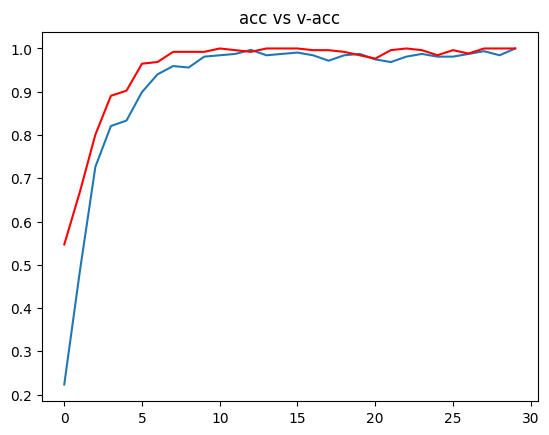

In [50]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c="red")
plt.title("acc vs v-acc")
plt.show()

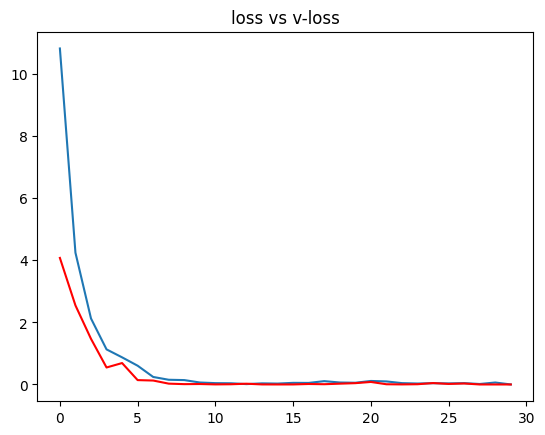

In [51]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c= "red")
plt.title("loss vs v-loss")
plt.show()

In [52]:
#just to map o/p values

op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 137ms/step
 the image is of Fear


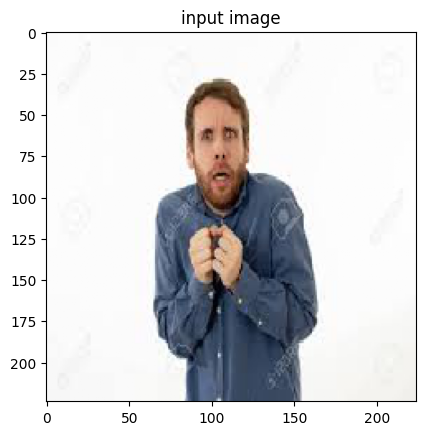

In [54]:
#path for the image to see if it predicts correct class

path="/content/f.jpg" #add the image path
img = load_img(path, target_size=(224,224))

i= img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

#to display the image

plt.imshow(input_arr[0])
plt.title("input image")
plt.show()
